In [1]:
import tensorflow as tf

### TokenA.fit_on_text([string]) ==> string에 대응하는 토큰화

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()                               # Token 생성
train_text = "The earth is an awesome place to live"
print("이전:",tokenizer.word_index)

# 단어 집합
tokenizer.fit_on_texts([train_text])  ## 이거해도 id는 같음.(immutable)
## ▲ train_test에 맞는 토큰 생성
print("이후:",tokenizer.word_index)
print("==================================")
print("TokenA.fit_on_text([string]) ==> string에 대응하는 토큰화")
# 정수 인코딩
sub_text = "The earth is an great place to live"
sequences = tokenizer.texts_to_sequences([sub_text])[0]
print("chk",tokenizer.texts_to_sequences([sub_text])[0])
print()


이전: {}
이후: {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'to': 7, 'live': 8}
TokenA.fit_on_text([string]) ==> string에 대응하는 토큰화
chk [1, 2, 3, 4, 6, 7, 8]



### pad_sequence() ==> 각 샘플의 길이가 다를 때, 맞춰줌

In [8]:
pad_sequences([[1,2,3],[3,4,5,6],[7,8]],maxlen=3,padding="pre")
## padding = "pre" : 빼거나, 0넣을 때 이전꺼로.
## padding = "post" : 빼거나 채울때, 이후꺼로


array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]])

### 임베딩 벡터 vs 원-핫 벡터
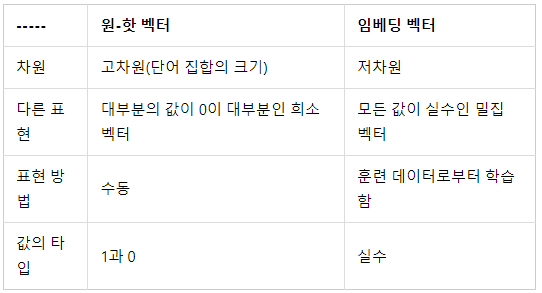


In [16]:
# 1. 단어 토큰화
tokenized_text = [['Hope','to','see','you','soon'],['Nice','to','see','you','again']]

#2. 정수 인코딩
encoded_text = [[0,1,2,3,4],[5,1,2,3,6]]

#3. 임베딩 벡터 생성
vocab_size = 7
embedding_dim =2
k = tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=5)
print(k)

### 모델링 ==> 층 구성
Sequential()
=> model.add()

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding as Embedding

# 임베딩 층 추가
model = Sequential()   # 모델생성
model.add(Embedding(vocab_size,embedding_dim,input_length=5))  # 임베딩 층 추가

# 전결합 층 추가
model = Sequential()
model.add(Dense(1,input_dim=3,activation='relu'))
## 첫 인자 : 출력 뉴런의 수
## input_dim : 입력한 뉴런의 수
## activation : 활성화 함수 ('reul'은 은닉층에 주로 사용됨)

# 하나 더 추가(전결합층)
model = Sequential()
model.add(Dense(8,input_dim=4,activation='relu'))
model.add(Dense(1,activation='sigmoid')) ## 출력층

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


### 컴파일 & 훈련
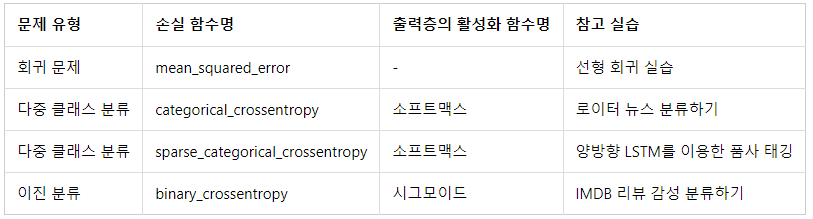

In [21]:
from tensorflow.keras.layers import SimpleRNN,Embedding,Dense
from tensorflow.keras.models import Sequential

vocab_size = 10000
embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size,embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss = 'binary_crossentropy',metrics=['acc'])
## 모델을 기계가 이해할 수 있도록 컴파일 해줌
### 손실함수, 옵티마이저, 메트릭함수 선택 필요.

모델학습

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=32)
# epochs :: 1 => 전체 데이터 한 차례 흝고 지나감 (총 훈련횟수)
### => 정숫값
# batch_size : default = 32, 미니 배치 경사 하강 안쓰고 싶으면
# batch_size = None

모델학습 -1. 검증데이터 사용
* verbose = 학습 중 출력되는 문구
```
0 : 출력x
1 : 훈련 진행도 보여주는 막대 보여줌
2 : 미니 배치마다 손실 정보 출력
```
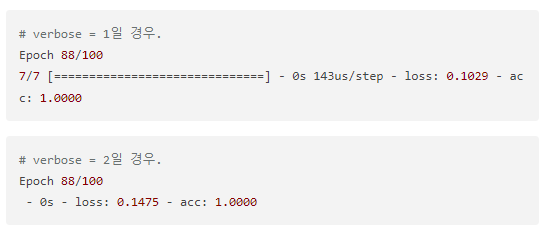

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=32,verbose=0,validation_data=(x_val,y_val))

## 검증데이터까지 사용.

모델학습 -2. 훈련데이터의 20& 자동으로 검증데이터로 사용

In [ ]:
model.fit(X_train,
          y_train,
          epochs=10,batch_size=32,verbose=0,validation_split=0.2)

### 평가 & 예측

In [ ]:
model.evaluate(X_test,  # test data
               y_test,  # label test data
               batch_size=32)

model.predict(X_input,batch_size)
## X_input이 현재 예측하고 싶은 데이터
# 임의 출력에 대한 모델의 출력값 확인.

저장, 로드

In [24]:
# save
model.save("model_name.h5") ## 모델 저장

# load
from tensorflow.keras.models import load_model
model = load_model("model_name.h5")